In [10]:
from Bio import Phylo
import pandas as pd
from io import StringIO
import re
import os
import matplotlib.pyplot as plt

In [3]:
def read_codeml_trees(tree_file):
    with open(tree_file, 'r') as file:
        tree_lines = file.readlines()

    # Extract the Newick tree strings
    ds_tree_str = tree_lines[1].strip()
    dn_tree_str = tree_lines[3].strip()
    wratios_tree_str = tree_lines[5].strip()  # Modified line for wratios tree

    # Parse the Newick trees using Biopython
    dn_tree = Phylo.read(StringIO(dn_tree_str), 'newick')
    ds_tree = Phylo.read(StringIO(ds_tree_str), 'newick')
    
    # Parsing wratios tree using Phylo.read
    wratios_tree = Phylo.read(StringIO(wratios_tree_str), 'newick')

    return dn_tree, ds_tree, wratios_tree

In [16]:
# dn_tree, ds_tree, wratios_tree = read_codeml_trees("OG0005554_free.out_trees")
# assign_internal_node_ids(dn_tree)
# print(dn_tree)

Tree(rooted=False, weight=1.0)
    Clade(name='InternalNode_0')
        Clade(branch_length=0.473873, name='InternalNode_1')
            Clade(branch_length=0.711316, name='Dpun')
            Clade(branch_length=0.272091, name='Bger')
        Clade(branch_length=0.000654, name='InternalNode_4')
            Clade(branch_length=0.309425, name='InternalNode_5')
                Clade(branch_length=0.059032, name='Bori')
                Clade(branch_length=0.056499, name='Pame')
            Clade(branch_length=0.190861, name='InternalNode_8')
                Clade(branch_length=0.17753, name='InternalNode_9')
                    Clade(branch_length=0.048638, name='Cmer')
                    Clade(branch_length=0.05965, name='Cpun')
                Clade(branch_length=2.2e-05, name='InternalNode_12')
                    Clade(branch_length=0.112438, name='Mdar')
                    Clade(branch_length=0.02248, name='InternalNode_14')
                        Clade(branch_length=0.044878, name

In [19]:
# Phylo.write(dn_tree, "exampletree.nwk", "newick")

1

<Figure size 2000x4000 with 0 Axes>

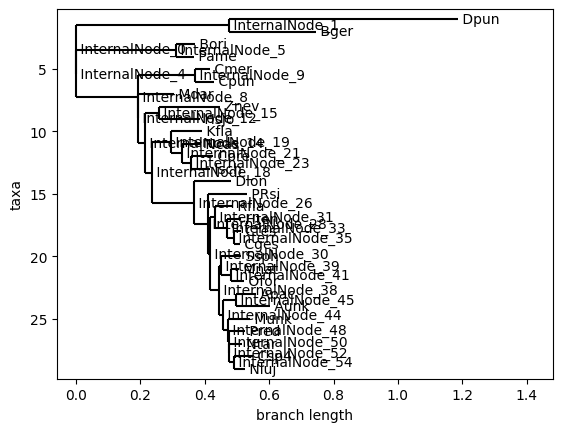

In [18]:
# plt.figure(figsize=(20, 40), dpi=100)
# Phylo.draw(dn_tree, do_show=False)
# plt.savefig('exampletree.png')

In [13]:
def assign_internal_node_ids(tree):
    # Assign unique identifiers to internal nodes
    for i, node in enumerate(tree.find_clades()):
        if not node.name:
            node.name = f'InternalNode_{i}'

In [70]:
def extract_node_values(tree, label):
    # Extract values from both terminal and internal nodes and create a DataFrame
    data = {'Node': [], f'{label}_Value': []}

    for node in tree.find_clades():
        data['Node'].append(node.name)
        data[f'{label}_Value'].append(node.branch_length if node.branch_length else 0)

    df = pd.DataFrame(data)
    return df

In [71]:
if __name__ == "__main__":
    # Replace 'path/to/orthogroups' with the actual path to your orthogroups directory
    orthogroup_directory = '/EBB-ZIVNFS/amikhail/termite_genomes/eusociality_paper/analyses/codeml'

    result_dfs = []  # List to store result DataFrames for each orthogroup

    # Loop through each orthogroup file in the directory
    for orthogroup_file in os.listdir(orthogroup_directory):
        if orthogroup_file.endswith("_free.out_trees"):
            orthogroup_file_path = os.path.join(orthogroup_directory, orthogroup_file)

            # Read the Newick trees and w-ratios from the CodeML output file
            dn_tree, ds_tree, wratios_tree = read_codeml_trees(orthogroup_file_path)

            # Assign unique identifiers to internal nodes
            assign_internal_node_ids(dn_tree)
            assign_internal_node_ids(ds_tree)
            assign_internal_node_ids(wratios_tree)

            # Extract dN, dS, and w ratios values
            dn_df = extract_node_values(dn_tree, 'dn')
            ds_df = extract_node_values(ds_tree, 'ds')
            wratios_df = extract_node_values(wratios_tree, 'w_ratios')

            # Merge the DataFrames on the 'Node' column
            result_df = pd.merge(dn_df, ds_df, on='Node')
            result_df = pd.merge(result_df, wratios_df, on='Node')

            # Add a column with the orthogroup information
            result_df['Orthogroup'] = os.path.splitext(orthogroup_file)[0]

            # Append the result DataFrame to the list
            result_dfs.append(result_df)

    # Concatenate all DataFrames in the list
    final_result_df = pd.concat(result_dfs, ignore_index=True)

    # Print the final result DataFrame
    print(final_result_df)

                  Node  dn_Value  ds_Value  w_ratios_Value      Orthogroup
0       InternalNode_0  0.000000  0.000000        0.000000  OG0005247_free
1       InternalNode_1  0.000041  0.012486      304.293000  OG0005247_free
2                 Dpun  0.473468  0.056542        0.119422  OG0005247_free
3                 Bger  1.188549  0.064417        0.054198  OG0005247_free
4       InternalNode_4  0.412504  0.000041        0.000100  OG0005247_free
...                ...       ...       ...             ...             ...
47077  InternalNode_52  0.000005  0.000000        0.000100  OG0005362_free
47078             Ntar  0.024618  0.003287        0.133535  OG0005362_free
47079  InternalNode_54  0.014305  0.000001        0.000100  OG0005362_free
47080             Csp4  0.009433  0.001561        0.165473  OG0005362_free
47081             Nluj  0.019030  0.001563        0.082135  OG0005362_free

[47082 rows x 5 columns]


In [75]:
final_result_df.head()

,Node,dn_Value,ds_Value,w_ratios_Value,Orthogroup
0,InternalNode_0,0.000000,0.000000,0.000000,OG0005247_free
1,InternalNode_1,0.000041,0.012486,304.293000,OG0005247_free
2,Dpun,0.473468,0.056542,0.119422,OG0005247_free
3,Bger,1.188549,0.064417,0.054198,OG0005247_free
4,InternalNode_4,0.412504,0.000041,0.000100,OG0005247_free


In [74]:
final_result_df.to_csv("/EBB-ZIVNFS/amikhail/termite_genomes/eusociality_paper/analyses/codeml/dNdSw_table.csv", index=False)